In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from et_xmlfile import xmlfile

In [2]:
df = pd.read_csv('car_data.csv');

In [3]:
df.head().T

,0,1,2,3,4
Car_Name,ritz,sx4,ciaz,wagon r,swift
Year,2014,2013,2017,2011,2014
Selling_Price,3.35,4.75,7.25,2.85,4.6
Present_Price,5.59,9.54,9.85,4.15,6.87
Kms_Driven,27000,43000,6900,5200,42450
Fuel_Type,Petrol,Diesel,Petrol,Petrol,Diesel
Seller_Type,Dealer,Dealer,Dealer,Dealer,Dealer
Transmission,Manual,Manual,Manual,Manual,Manual
Owner,0,0,0,0,0


In [4]:
df['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [5]:
cols_to_remove = ['Car_Name']
df.drop(cols_to_remove, axis=1, inplace=True);

In [6]:
df.isnull().sum()

Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df['Selling_Price'] = df['Selling_Price'] * 1e2
df['Present_Price'] = df['Present_Price'] * 1e2

In [8]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [9]:
df['Transmission'].replace(['Manual', 'Automatic'], [0, 1], inplace=True)
df['isAutomatic'] = df['Transmission']
df.drop(['Transmission'], axis=1, inplace=True)

In [10]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [11]:
df['Seller_Type'].replace(['Dealer', 'Individual'], [1, 0], inplace=True)
df['isDealer'] = df['Seller_Type']
df.drop(['Seller_Type'], axis=1, inplace=True)

In [12]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

C:\Users\yogesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

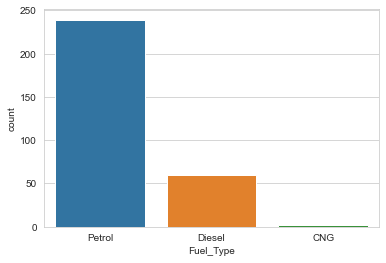

In [13]:
sns.countplot(df['Fuel_Type'])

In [14]:
df = df[df['Fuel_Type'].isin(['Petrol', 'Diesel'])]

C:\Users\yogesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

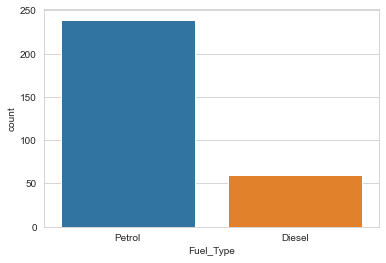

In [15]:
sns.countplot(df['Fuel_Type'])

In [16]:
df.head().T

,0,1,2,3,4
Year,2014,2013,2017,2011,2014
Selling_Price,335.0,475.0,725.0,285.0,460.0
Present_Price,559.0,954.0,985.0,415.0,687.0
Kms_Driven,27000,43000,6900,5200,42450
Fuel_Type,Petrol,Diesel,Petrol,Petrol,Diesel
Owner,0,0,0,0,0
isAutomatic,0,0,0,0,0
isDealer,1,1,1,1,1


In [17]:
df['Fuel_Type'].replace(['Diesel', 'Petrol'], [0, 1], inplace=True)
df['isPetrol'] = df['Fuel_Type']
df.drop(['Fuel_Type'], axis=1, inplace=True)

In [18]:
df.head().T

,0,1,2,3,4
Year,2014.0,2013.0,2017.0,2011.0,2014.0
Selling_Price,335.0,475.0,725.0,285.0,460.0
Present_Price,559.0,954.0,985.0,415.0,687.0
Kms_Driven,27000.0,43000.0,6900.0,5200.0,42450.0
Owner,0.0,0.0,0.0,0.0,0.0
isAutomatic,0.0,0.0,0.0,0.0,0.0
isDealer,1.0,1.0,1.0,1.0,1.0
isPetrol,1.0,0.0,1.0,1.0,0.0


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,299.0,2013.632107,2.896151,2003.0,2012.0,2014.0,2016.0,2018.0
Selling_Price,299.0,467.173913,509.820968,10.0,85.0,365.0,600.0,3500.0
Present_Price,299.0,763.658863,867.182109,32.0,120.0,640.0,990.0,9260.0
Kms_Driven,299.0,36908.397993,39009.724028,500.0,15000.0,32000.0,48383.5,500000.0
Owner,299.0,0.043478,0.248720,0.0,0.0,0.0,0.0,3.0
isAutomatic,299.0,0.133779,0.340986,0.0,0.0,0.0,0.0,1.0
isDealer,299.0,0.645485,0.479168,0.0,0.0,1.0,1.0,1.0
isPetrol,299.0,0.799331,0.401172,0.0,1.0,1.0,1.0,1.0


In [20]:
df['Owner'].unique()

array([0, 1, 3], dtype=int64)

<AxesSubplot:ylabel='count'>

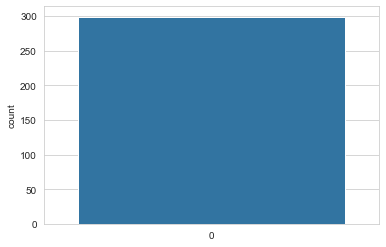

In [21]:
sns.countplot(data=df['Owner'])

In [22]:
df.drop(['Owner'], axis=1, inplace=True)

In [23]:
df['Year'].max()

2018

In [24]:
df['Age'] = abs(df['Year'] - (df['Year'].max()+1))
df.drop(['Year'], axis=1, inplace=True)

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Selling_Price,299.0,467.173913,509.820968,10.0,85.0,365.0,600.0,3500.0
Present_Price,299.0,763.658863,867.182109,32.0,120.0,640.0,990.0,9260.0
Kms_Driven,299.0,36908.397993,39009.724028,500.0,15000.0,32000.0,48383.5,500000.0
isAutomatic,299.0,0.133779,0.340986,0.0,0.0,0.0,0.0,1.0
isDealer,299.0,0.645485,0.479168,0.0,0.0,1.0,1.0,1.0
isPetrol,299.0,0.799331,0.401172,0.0,1.0,1.0,1.0,1.0
Age,299.0,5.367893,2.896151,1.0,3.0,5.0,7.0,16.0


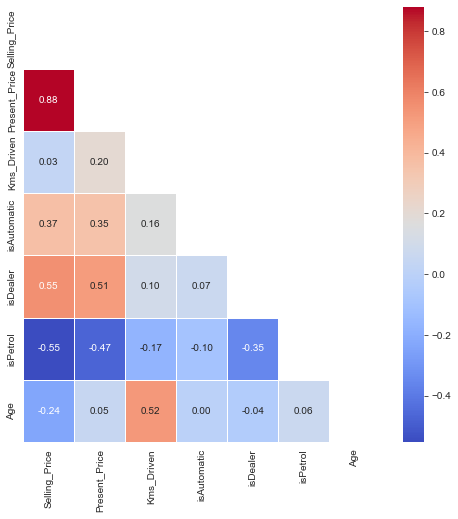

In [26]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(8, 8))
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
sns.heatmap(corr, cmap='coolwarm', linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

In [27]:
df.to_csv('car_data_cleaned.csv', index=False)

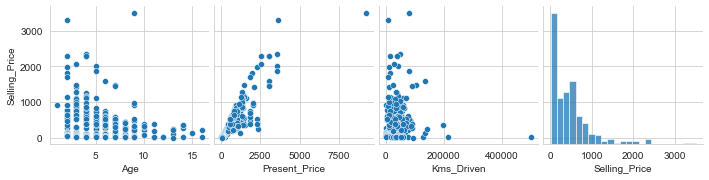

In [28]:
sns.pairplot(y_vars=['Selling_Price'], x_vars=['Age', 'Present_Price', 'Kms_Driven', 'Selling_Price'], data=df)

In [29]:
len(df)

299

In [30]:
from scipy import stats
df = df[(np.abs(stats.zscore(df[['Age', 'Present_Price', 'Kms_Driven', 'Selling_Price']])) < 2.327).all(axis=1)]

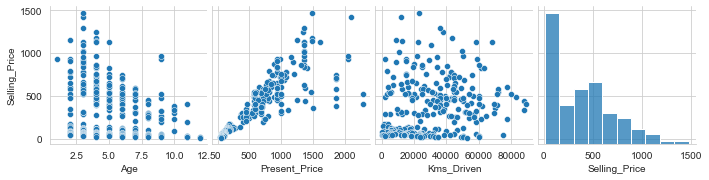

In [31]:
sns.pairplot(y_vars=['Selling_Price'], x_vars=['Age', 'Present_Price', 'Kms_Driven', 'Selling_Price'], data=df)

In [32]:
len(df)

271

In [33]:
df.drop('isAutomatic', axis=1, inplace=True)

C:\Users\yogesh\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


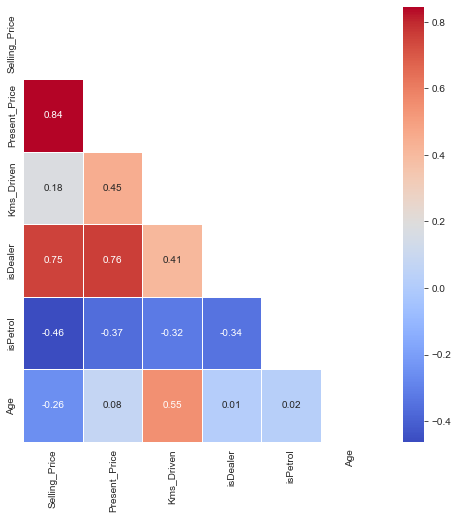

In [34]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(8, 8))
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
sns.heatmap(corr, cmap='coolwarm', linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

In [35]:
df.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'isDealer', 'isPetrol',
       'Age'],
      dtype='object')

In [36]:
df = df[['Selling_Price', 'Present_Price', 'Age', 'Kms_Driven', 'isDealer', 'isPetrol']]

In [37]:
df.to_csv('car_data_cleaned.csv', index=False)

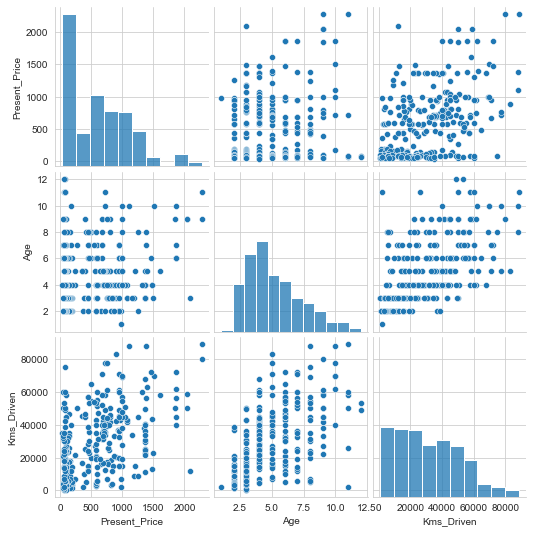

In [38]:
sns.pairplot(df[['Present_Price', 'Age', 'Kms_Driven',]])

In [39]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant

In [41]:
df = pd.read_csv('car_data_cleaned.csv')


In [42]:
df.head()

,Selling_Price,Present_Price,Age,Kms_Driven,isDealer,isPetrol
0,335.0,559.0,5,27000,1,1
1,475.0,954.0,6,43000,1,0
2,725.0,985.0,2,6900,1,1
3,285.0,415.0,8,5200,1,1
4,460.0,687.0,5,42450,1,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Selling_Price  271 non-null    float64
 1   Present_Price  271 non-null    float64
 2   Age            271 non-null    int64  
 3   Kms_Driven     271 non-null    int64  
 4   isDealer       271 non-null    int64  
 5   isPetrol       271 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 12.8 KB


In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Selling_Price,271.0,389.826568,320.605924,12.0,76.5,360.0,582.5,1473.0
Present_Price,271.0,620.992620,510.847474,32.0,102.0,590.0,940.0,2283.0
Age,271.0,5.040590,2.348012,1.0,3.0,4.0,6.0,12.0
Kms_Driven,271.0,31343.856089,20365.212293,500.0,15000.0,30000.0,45000.0,89000.0
isDealer,271.0,0.638376,0.481360,0.0,0.0,1.0,1.0,1.0
isPetrol,271.0,0.830258,0.376100,0.0,1.0,1.0,1.0,1.0


In [45]:
x = df.drop(['Selling_Price'], axis=1)
y = df['Selling_Price']

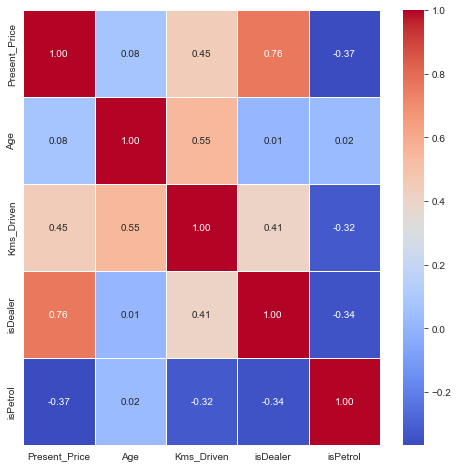

In [46]:
corr = x.corr()
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr, cmap='coolwarm', linewidths=.5, annot=True, fmt=".2f")
plt.show()

In [47]:
lr = LinearRegression()
lr.fit(x, y)
predictions = lr.predict(x)

In [48]:
lr.score(x, y)

0.8679377197879856

In [49]:
actual_values = y

mean =  0.0


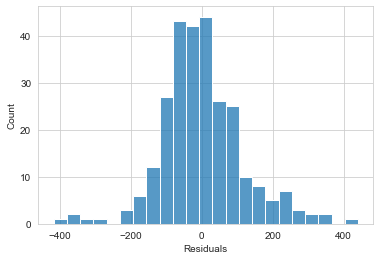

In [50]:
residuals = actual_values - predictions
plt = sns.histplot(residuals)
plt.set_xlabel('Residuals')
print("mean = ", round(np.mean(residuals), 2))

Text(0, 0.5, 'Residuals')

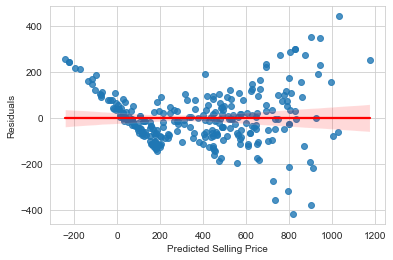

In [51]:
plt = sns.regplot(x=predictions, y=residuals, line_kws={"color": "red"})
plt.set_xlabel('Predicted Selling Price')
plt.set_ylabel('Residuals')

In [52]:
results = OLS(y, add_constant(x)).fit()


C:\Users\yogesh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [53]:
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

In [54]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     348.3
Date:                Fri, 06 May 2022   Prob (F-statistic):          3.00e-114
Time:                        10:39:41   Log-Likelihood:                -1673.4
No. Observations:                 271   AIC:                             3359.
Df Residuals:                     265   BIC:                             3380.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           378.1224     28.231     13.394

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
lr = LinearRegression()
lr.fit(x, y)
predictions = lr.predict(x)

In [59]:
lr.score(x, y)

0.8679377197879856

Text(0.5, 0, 'Actual Selling Price')

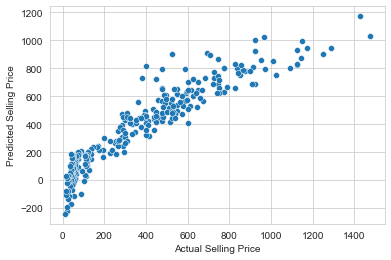

In [62]:
plt = sns.scatterplot(x=y, y=predictions)
plt.set_ylabel("Predicted Selling Price")
plt.set_xlabel("Actual Selling Price")